## Import required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [6]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [7]:
cur_path

'C:\\Users\\ThinkPad\\OneDrive\\Bureau\\TrafficSignsWebApp'

## Preprocess the images

In [8]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [9]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [10]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'training'

## Load data & Labels

In [11]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [12]:
print(data.shape, labels.shape)

(41639, 30, 30, 3) (41639,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33311, 30, 30, 3) (8328, 30, 30, 3) (33311,) (8328,)


## Convert labels to onehot encoding

In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [16]:
model = Sequential()
# Add the first layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
# Add another convolution layer
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# Add pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add a drop out layer
model.add(Dropout(rate=0.25))
# Add another convolution layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add another convolution layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add another pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Add another drop out layer
model.add(Dropout(rate=0.25))
# Add a flattening layer
model.add(Flatten())
# Add a layer with 256 neurons
model.add(Dense(256, activation='relu'))
# Add another drop out layer
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#Train the model
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1041/1041 [==============================] - 74s 71ms/step - loss: 1.8748 - accuracy: 0.5156 - val_loss: 0.5015 - val_accuracy: 0.8694
Epoch 2/20
1041/1041 [==============================] - 78s 75ms/step - loss: 0.6897 - accuracy: 0.7941 - val_loss: 0.2397 - val_accuracy: 0.9335
Epoch 3/20
1041/1041 [==============================] - 66s 64ms/step - loss: 0.4360 - accuracy: 0.8681 - val_loss: 0.1884 - val_accuracy: 0.9418
Epoch 4/20
1041/1041 [==============================] - 69s 66ms/step - loss: 0.3662 - accuracy: 0.8894 - val_loss: 0.1275 - val_accuracy: 0.9648
Epoch 5/20
1041/1041 [==============================] - 73s 70ms/step - loss: 0.3164 - accuracy: 0.9062 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 6/20
1041/1041 [==============================] - 76s 73ms/step - loss: 0.2803 - accuracy: 0.9179 - val_loss: 0.0995 - val_accuracy: 0.9696
Epoch 7/20
1041/1041 [==============================] - 66s 64ms/step - loss: 0.2877 - accuracy: 0.9161 - val_loss: 0.0862 -

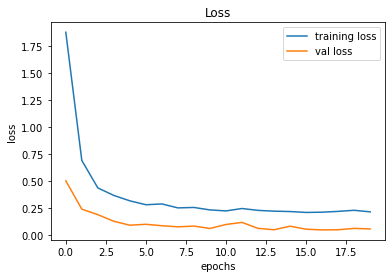

In [19]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

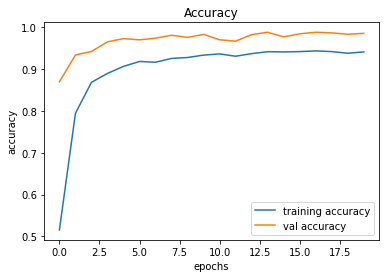

In [20]:
# accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Testing on Test.csv data

In [21]:

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [22]:
X_test, label = testing('Test.csv')

In [23]:
# Y_pred = model.predict_classes(X_test)
Y_pred = np.argmax(model.predict(X_test), axis=-1)
Y_pred


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

## Accuracy with the test data

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.947901821060966


## Save the model

In [25]:
model.save("./training/TSR.h5")

## Load the Model

In [26]:

from keras.models import load_model
model = load_model('./training/TSR.h5')

In [27]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)
    return image,Y_pred

## Now you can test with any image

In [29]:
from tkinter import Tk, filedialog
root = Tk() # pointing root to Tk() to use it as Tk() in program.
root.withdraw() # Hides small tkinter window.
root.attributes('-topmost', True) # Opened windows will be active. above all windows despite of selection.
# Open dialog box to select images with certain extensions.
uploaded_file = filedialog.askopenfilenames(filetypes=[("Image Files", ".png .jfif, .jpg, .jpeg")]) # returns a tuple with opened file's complete path
uploaded_file = uploaded_file[0]
print(uploaded_file)

C:/Users/ThinkPad/OneDrive/Bureau/trafficLightsRec/Test/00006.png


Predicted traffic sign is:  General caution


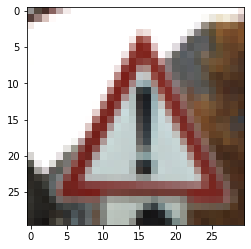

In [30]:
plot,prediction = test_on_img(uploaded_file)
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()